# Vectors Practice

In this chapter we will work with vectors and code Gramm-Schmidt Orthonormalization Algorithm

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import lovely_numpy as ln
import json_tricks



In [17]:
inputs = json_tricks.load('/workspaces/linear-algebra-part-1/.laborantum/texts/course/1. Vectors/Vectors Practice/inputs/inputs.json')
# inputs1 = json_tricks.load('.inputs2.json')

answers = {}

In your input you have arrys of shape $N \times 2$, which means that you have 2 vectors both having N coordinates

In [18]:
for one_input in inputs:
    print(one_input)
    print(ln.lovely(one_input['X']))

OrderedDict([('X', array([[  2,   5],
       [-10,  -7]]))])
array[2, 2] i64 n=4 x∈[-10, 5] μ=-2.500 σ=6.185 [[2, 5], [-10, -7]]
OrderedDict([('X', array([[-7, -3],
       [-1,  9],
       [ 8, -6],
       [-4,  2],
       [-9, -4]]))])
array[5, 2] i64 n=10 x∈[-9, 9] μ=-1.500 σ=5.784 [[-7, -3], [-1, 9], [8, -6], [-4, 2], [-9, -4]]
OrderedDict([('X', array([[  4,   7],
       [ -5,   3],
       [ -2,  -1],
       [  9,   6],
       [  9,  -5],
       [  5,   5],
       [-10,   8],
       [ -7,   7],
       [  9,   9]]))])
array[9, 2] i64 n=18 x∈[-10, 9] μ=2.833 σ=6.039
OrderedDict([('X', array([[  4,  -3],
       [-10,  -9],
       [ -1, -10],
       [  0,  -7],
       [  1,   8]]))])
array[5, 2] i64 n=10 x∈[-10, 8] μ=-2.700 σ=5.900 [[4, -3], [-10, -9], [-1, -10], [0, -7], [1, 8]]
OrderedDict([('X', array([[ -8, -10],
       [-10,  -6],
       [ -5,  -4],
       [ -2,   7],
       [  5,  -6],
       [ -1,   0],
       [ -9,  -9],
       [ -3,  -1],
       [ -7,  -4]]))])
array[9, 2] i64

# Task 1. Vector lenghts

- Write a function that calculates vector lengths, answer should return array of shape $2$
- Apply this function to all the inputs

In [19]:
def get_lengths(X):
    res = None
    ## YOUR CODE HERE
    res = np.sqrt(X[0] ** 2 + X[1] ** 2)
    return res

In [20]:
answers['lengths'] = [
    get_lengths(**inp) for inp in inputs
]

# Task 2. Vector directions

- Write a function that calculates vector directions. Result should be of the same shape as the original array X
- Use $10^{-8}$ addition in division to avoid division by zero
- Apply this function to all arrays in the inputs

In [21]:
def get_directions(X):
    res = None
    ## YOUR CODE HERE
    res = np.arctan2(X[1], X[0] + 1e-8)
    return res

In [22]:
answers['directions'] = [
    get_directions(**inp) for inp in inputs
]

# Step 3. Visualization

We will visualize vectors and directions using `matplotlib` 

(np.int64(0), np.int64(0)) (np.int64(0), np.int64(0)) (np.int64(2), np.int64(5)) (np.int64(-10), np.int64(-7))
(np.float64(0.0), np.float64(0.0)) (np.float64(0.0), np.float64(0.0)) (np.float64(0.39223227216209994), np.float64(1.1624763889776886)) (np.float64(-1.961161351004694), np.float64(-1.62746694131383))


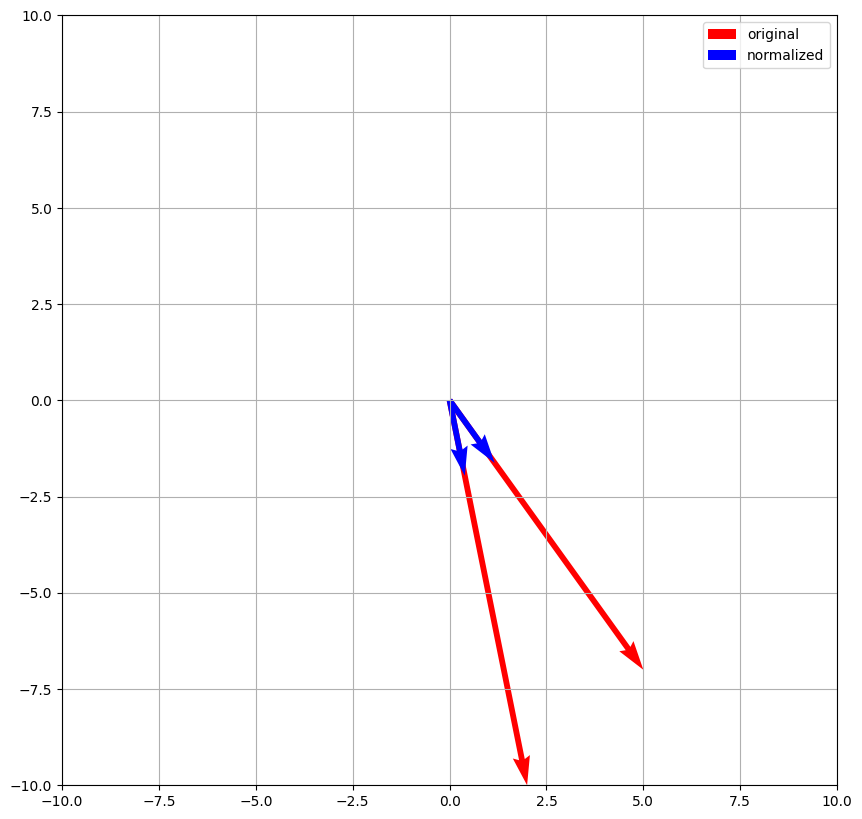

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)

print(X, Y, U, V)

ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['directions'][0]
# Convert angles to unit vectors
U = np.cos(X) * 2
V = np.sin(X) * 2
origins = np.zeros_like(U)
norms = np.stack([origins, origins, U, V], axis=1)
X, Y, U, V = zip(*norms)

print(X, Y, U, V)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
plt.draw()
plt.grid()
plt.legend(['original', 'normalized'])
plt.show()


# Task 4. Scalar Product

Write a function that calculates
- cosine similarity between the vectors ($\cos \theta$)
- use $10^{-8}$ additional constant in the denominator for the sake of numerical stability

In [24]:
def get_cosine(X):
    res = None
    res = np.dot(X[0], X[1]) / (answers['lengths'][0] * answers['lengths'][1])
    return res

In [25]:
answers['cosine'] = [
    get_cosine(**inp) for inp in inputs
]

In [26]:
print(answers['cosine'][0])

[-0.76271277 -0.67394674]


# Task 5. Orthonormalization

Create a pair of orthonormal vectors
- Take the first vector and normalize it
- Take the second vector, remove the collinear component to the first one
- Normalize it

In [27]:

def get_orthonormal(X):
    res = X.copy().astype('float32')
    # Normalize the first vector
    v1 = res[0]
    v1_norm = v1 / (np.linalg.norm(v1) + 1e-8)
    # Remove the projection of v2 onto v1
    v2 = res[1]
    proj = np.dot(v2, v1_norm) * v1_norm
    v2_orth = v2 - proj
    v2_norm = v2_orth / (np.linalg.norm(v2_orth) + 1e-8)
    # Stack the orthonormal vectors
    return np.stack([v1_norm, v2_norm])


In [28]:
answers['orthonormal'] = [
    get_orthonormal(**inp) for inp in inputs
]

# 6. Visualization

[[  2   5]
 [-10  -7]]
[[ 0.37139067  0.9284767 ]
 [-0.9284767   0.37139064]]


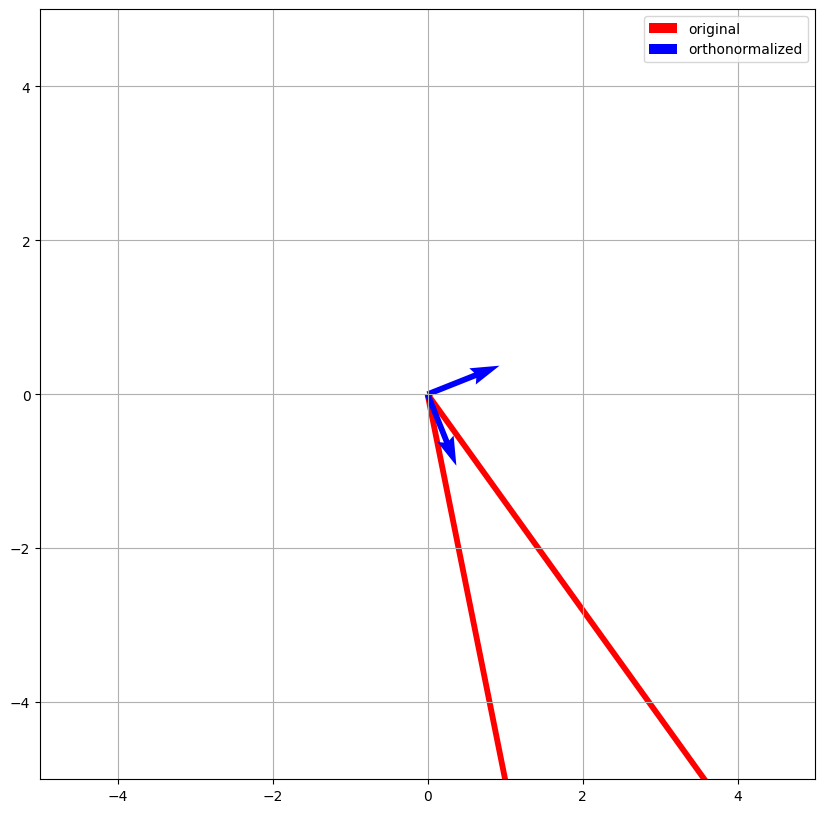

In [29]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
ax = plt.gca()
X = inputs[0]['X']
print(X)
vecs = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*vecs)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'red')

X = answers['orthonormal'][0]
print(X)
norms = np.concatenate([np.zeros_like(X), X.T], axis=1)
X, Y, U, V = zip(*norms)
ax.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale=1, color = 'blue')
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
plt.draw()
plt.grid()
plt.legend(['original', 'orthonormalized'])
plt.show()


# 7. Saving the answer

In [30]:
json_tricks.dump(answers, '.answer.json')

'{"lengths": [{"__ndarray__": [10.198039027185569, 8.602325267042627], "dtype": "float64", "shape": [2]}, {"__ndarray__": [7.0710678118654755, 9.486832980505138], "dtype": "float64", "shape": [2]}, {"__ndarray__": [6.4031242374328485, 7.615773105863909], "dtype": "float64", "shape": [2]}, {"__ndarray__": [10.770329614269007, 9.486832980505138], "dtype": "float64", "shape": [2]}, {"__ndarray__": [12.806248474865697, 11.661903789690601], "dtype": "float64", "shape": [2]}, {"__ndarray__": [8.06225774829855, 10.770329614269007], "dtype": "float64", "shape": [2]}, {"__ndarray__": [7.615773105863909, 7.810249675906654], "dtype": "float64", "shape": [2]}, {"__ndarray__": [4.242640687119285, 6.082762530298219], "dtype": "float64", "shape": [2]}, {"__ndarray__": [10.63014581273465, 10.63014581273465], "dtype": "float64", "shape": [2]}, {"__ndarray__": [9.848857801796104, 6.082762530298219], "dtype": "float64", "shape": [2]}, {"__ndarray__": [13.45362404707371, 11.661903789690601], "dtype": "flo